### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent variable:  Congruency of a word with its font color
<br>
Dependent variable:  Time for person to name word font colors

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

<dl>
    <dt>Null Hypothesis:  $H_0:  \mu_{t_c} = \mu_{t_{ic}}$</dt>
    <dd>The time for a person to name word font colors won't be significantly impacted by the color's congruency with the word.  i.e., $\mu_{t_c}$ (Population Mean Time to name Congruent color) = $\mu_{t_{ic}}$ (Population Mean Time to name InCongruent color)</dd>
    <br>
    <dt>Alternative Hypothesis:  $H_A:  \mu_{t_c} != \mu_{t_{ic}}$</dt>
    <dd>The time will be impacted by congruency.</dd>
    <br>
    <dt>Statistical Test:</dt>
    <dd>A paired t-test will be used to compare the means of the two datasets.</dd>
    <br>
    <dt>Assumptions for Paired T-Test:</dt>
    <dd><ul>
        <li>Interval or ratio scale of measurement?  Yes, time meets this criteria.</li>
        <li>Random sampling from a defined population?  Yes, assuming data set collected by random sampling.</li>
        <li>Samples or sets of data used to produce the difference scores are linked in the population through repeated measurement, natural association, or matching?  Yes, samples linked through repeated measurement.</li>
        <li>Scores are normally distributed in the population; difference scores are normally distributed?  Data is somewhat evenly distributed, but not normal.  However, this test is typically "robust" for violations of normal distribution, especially since we're using a two-tailed test.</li>
        </ul>
    </dd>
</dl>

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
# Perform the analysis here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
# Provide measure of central tendency (e.g., mean/median/mode)
# Provide measure of variability (e.g., variance/standard deviation)
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


<dl>
    <dt>Measures of Central Tendency</dt>
    <dd>Congruent Data</dd>
    <table style="display: block; margin: left;">
        <tr>
            <th>Measure</th>
            <th>Value</th>
        </tr>
        <tr>
            <td>Mean</td>
            <td>14.05</td>
        </tr>
        <tr>
            <td>Median</td>
            <td>14.36</td>
        </tr>
    </table>
    <br>
    <dd>Incongruent Data </dd>
    <table style="display: block; margin: left;">
        <tr>
            <th>Measure</th>
            <th>Value</th>
        </tr>
        <tr>
            <td>Mean</td>
            <td>22.02</td>
        </tr>
        <tr>
            <td>Median</td>
            <td>21.02</td>
        </tr>
    </table>
    <br><br>
    <dt>Measures of Variability</dt>
    <dd>Congruent Data</dd>
    <table style="display: block; margin: left;">
        <tr>
            <th>Measure</th>
            <th>Value</th>
        </tr>
        <tr>
            <td>Variance</td>
            <td>12.67</td>
        </tr>
        <tr>
            <td>Standard Deviation</td>
            <td>3.56</td>
        </tr>
    </table>
    <br>
    <dd>Incongruent Data</dd>
    <table style="display: block; margin: left;">
        <tr>
            <th>Measure</th>
            <th>Value</th>
        </tr>
        <tr>
            <td>Variance</td>
            <td>23.01</td>
        </tr>
        <tr>
            <td>Standard Deviation</td>
            <td>4.80</td>
        </tr>
    </table>
</dl>

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

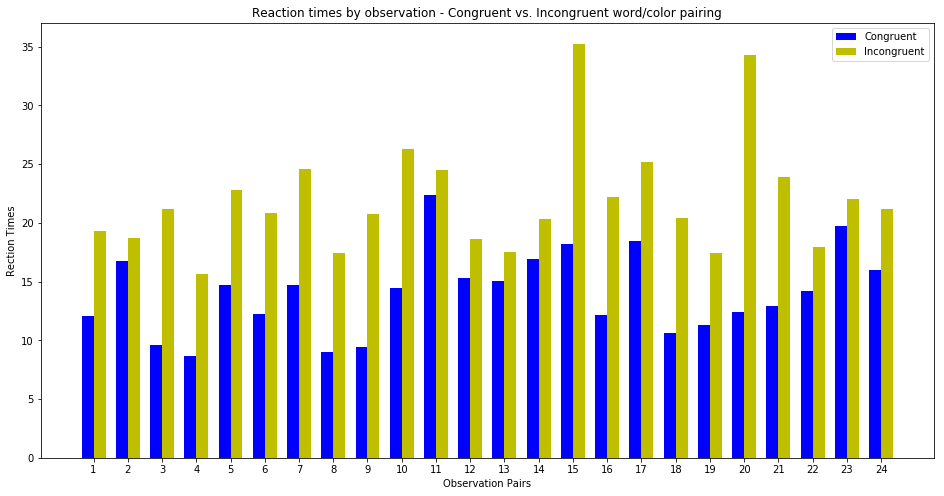

In [3]:
# Visualization - paired bar plot:
samples = df.shape[0]

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(16)
index = np.arange(samples)  # the x locations for the groups
width = 0.35                # the width of the bars
con_plot1 = ax.bar(index, df.Congruent, width, color='b', bottom=0)
incon_plot2 = ax.bar(index + width, df.Incongruent, width, color='y', bottom=0)

ax.set_title('Reaction times by observation - Congruent vs. Incongruent word/color pairing')
ax.set_xticks(index + width / 2)
ax.set_xticklabels(range(1, 25))
ax.set_xlabel('Observation Pairs')
ax.set_ylabel('Rection Times')

ax.legend((con_plot1[0], incon_plot2[0]), ('Congruent', 'Incongruent'));

Observations:
* The incongruent pairings always result in a longer reaction time
* The impact and spread of the incongruent results appears to have higher variance

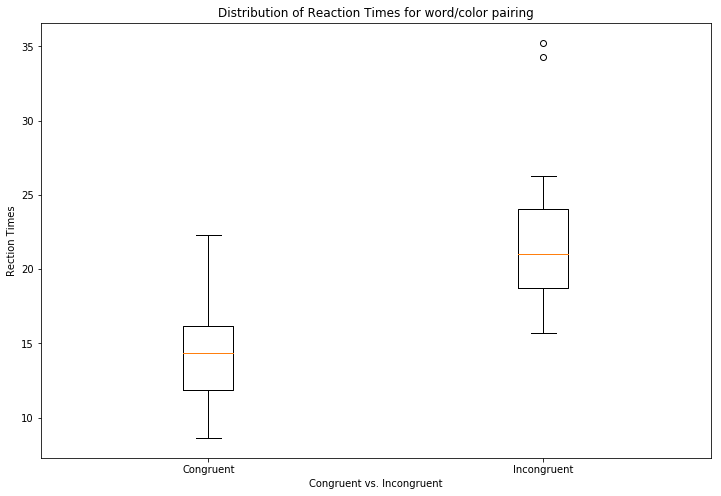

In [4]:
# Visualization - side-by-side box plots:
datasets = [df.Congruent, df.Incongruent]

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(12)
boxplot = ax.boxplot(datasets);

ax.set_title('Distribution of Reaction Times for word/color pairing')
ax.set_xticklabels(['Congruent', 'Incongruent'])
ax.set_xlabel('Congruent vs. Incongruent')
ax.set_ylabel('Rection Times');

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [6]:
# Statistical tests:
from scipy.stats import ttest_rel
import statsmodels.stats.api as sms

tstat, pval = ttest_rel(df.Congruent, df.Incongruent)
cm = sms.CompareMeans(sms.DescrStatsW(df.Congruent), sms.DescrStatsW(df.Incongruent))

print(f'T Statistic:  {tstat}')
print(f'P-value:  {pval}')
print(f'95% Confidence Interval:  {cm.tconfint_diff(usevar="unequal")}')
# R t.test with paired data?...

T Statistic:  -8.020706944109957
P-value:  4.103000585711178e-08
95% Confidence Interval:  (-10.424698188163974, -5.504885145169363)


The Null Hypothesis states the means for the Congruent and Incongruent datasets are equal.  The results show we reject the Null.  The T Statistic is quite large - it's showing that there's a large difference between the means of the datasets.  From looking at the above plot, this makes sense.  The mean of the first (congruent) dataset is quite a bit lower than the second.  The P-value is quite low:  p < 0.001.  This is showing that the chance of Type I error is very remote.  The confidence interval shows the difference in means is roughly between -10.4 to -5.5, or the mean of the congruent dataset is quite a bit lower than the incongruent dataset.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

The results are most likely caused by a sort of cognitive dissonance impeding reaction time.  Thus any object shown with incongruent aspects where the subject must process these aspects will likely yield a reduced reaction time.

#### Resources Used
* StackOverflow
* Matplotlib docs/site
* <a href="http://www.psychology.emory.edu/clinical/bliwise/Tutorials/TOM/meanstests/assump.htm">Test Assumptions</a>
* <a href="http://support.minitab.com/en-us/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/why-use-paired-t/">Why should I use a paired t test?</a>